# Exercici Regressió

Farem una regressió multiple sobre un problema real. Emprarem el *California Housing* dataset.

<img src="california.png"  width="500"/>

>This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
>
> **The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars (100,000).**
>
>This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
>
>An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.
>
>It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

Importam les llibreries que utilitzarem.

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

Carregam les dades i realitzam una primera exploració inicial.

### Esto son barrios

In [3]:
housing = fetch_california_housing(as_frame=True)

print(housing.keys())
df = housing.frame

df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Podem observar com es distribuixen les dades. ``Pandas`` té una funció que ens retorna informació estadística per cada una de les característiques.

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


# Treball vostre

Fer un model de regressió lineal per prediure el valor de les cases a un barri (la darrera columna). 

In [49]:
label = df.iloc[:, -1]
data = df.iloc[:, :-1]

In [50]:
label

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [51]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# !pip install seaborn

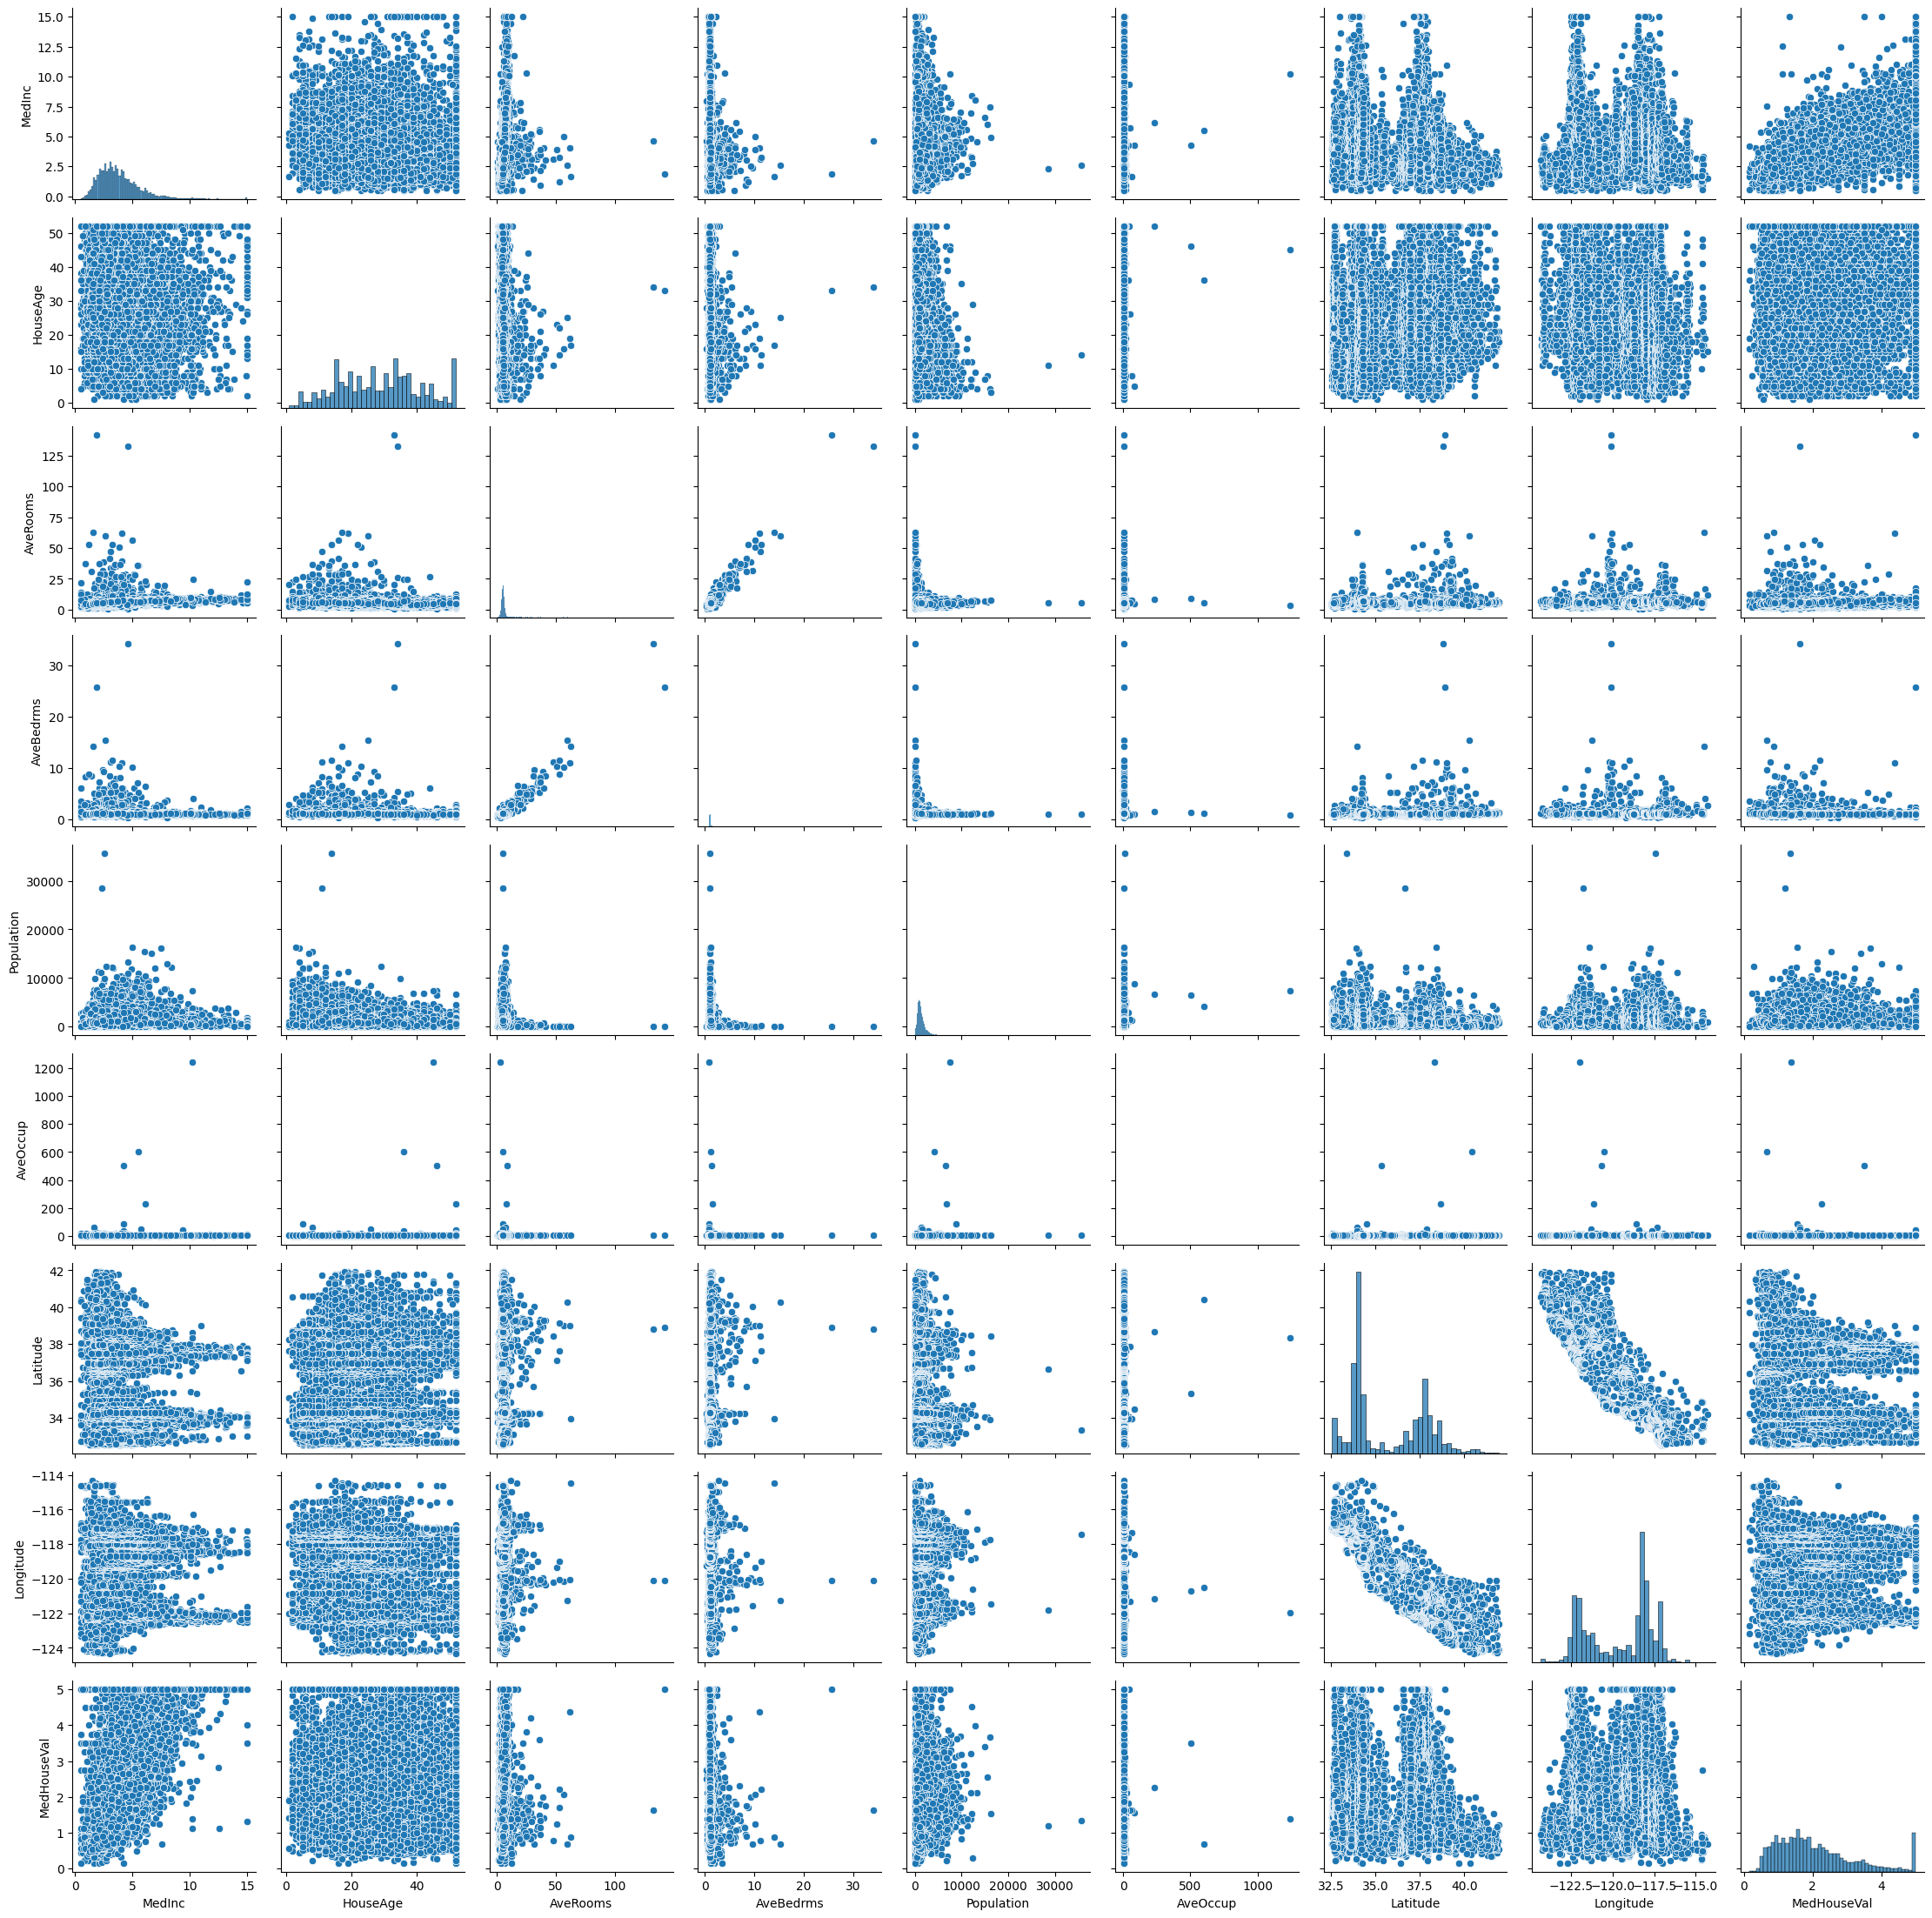

In [62]:
import seaborn as sns

g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

Importamos las librerías necesarias

In [52]:
import math
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

Creamos el modelo de regresión lineal

In [53]:
regr = LinearRegression(fit_intercept=True)

Separamos los datos de train y test

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.33, random_state=42)

Ara sí que podem entrenar el model amb les dades d'entrenament. 

In [65]:
regr.fit(X_train, Y_train);

In [66]:
regr.intercept_

-37.082010939080064

In [67]:
regr.coef_

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990808e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

## Estimam es valors

In [68]:
y_pred = regr.predict(X_test)

In [82]:
type(X_test)

pandas.core.frame.DataFrame

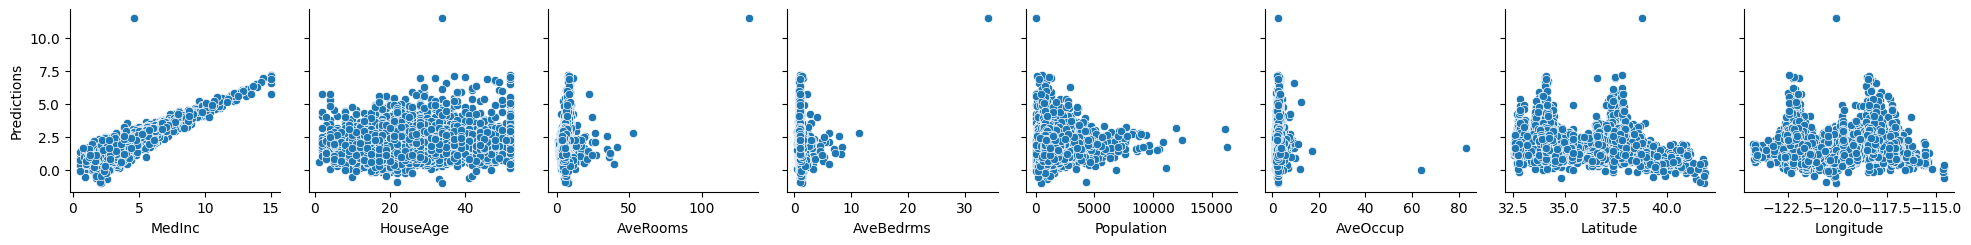

In [84]:
df_pred=X_test.copy()
df_pred["Predictions"]=y_pred

g = sns.PairGrid(df_pred, y_vars=['Predictions'], x_vars=X_test.columns)
g.map(sns.scatterplot)

In [90]:
mean_absolute_error(Y_test, y_pred)

0.5295710106684458

In [91]:
mean_squared_error(Y_test, y_pred)

0.5369686543372468